In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
(X_train_all, y_train_all), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_valid, X_train = X_train_all[:5000] / 255.0, X_train_all[5000:] / 255.0
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

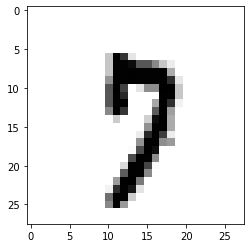

In [3]:
plt.imshow(X_train[25], cmap=mpl.cm.binary)
#plt.axis("off")
plt.show()

## Creating a Sequential model

In [4]:
model = tf.keras.models.Sequential()

In [5]:
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [6]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [7]:
weights, biases = model.layers[2].get_weights()

In [8]:
weights

array([[-0.09685592, -0.04689107, -0.14023036, ...,  0.00232236,
         0.08981578, -0.06749306],
       [-0.02642385, -0.00026681,  0.11217569, ...,  0.05540811,
        -0.09820011, -0.1264267 ],
       [-0.03010412, -0.09605379,  0.10325116, ..., -0.1014234 ,
        -0.03781668,  0.01905745],
       ...,
       [ 0.13546835,  0.00622115, -0.06527697, ...,  0.11353923,
        -0.10661204,  0.05140887],
       [-0.08176536,  0.04046735, -0.10585856, ...,  0.07630293,
         0.07468432,  0.05518517],
       [ 0.05875824,  0.13914372, -0.10754946, ..., -0.07072852,
        -0.02339888,  0.05881067]], dtype=float32)

In [9]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6373 - sparse_categorical_accuracy: 0.8348 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.9132
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2957 - sparse_categorical_accuracy: 0.9165 - val_loss: 0.2494 - val_sparse_categorical_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2441 - sparse_categorical_accuracy: 0.9306 - val_loss: 0.2114 - val_sparse_categorical_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2102 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.1834 - val_sparse_categorical_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1839 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1661 - val_sparse_categorical_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1631 - spars

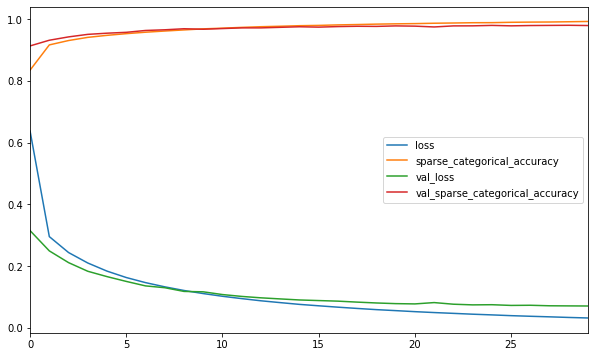

In [11]:
pd.DataFrame(history.history).plot(figsize=(10, 6))

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 14.9817 - sparse_categorical_accuracy: 0.9733


[14.98169231414795, 0.9732999801635742]